In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import eigh, norm
from scipy.sparse.linalg import expm_multiply

In [2]:
def time_evol(t,H,N_em=1,psi=[1.]):
    
    n = np.shape(H)[0]-N_em
    psi_in = np.array([0.]*n + psi)

    temp = expm_multiply(-1.j*H,psi_in,0,1,100)
    
    return temp[:,-1], temp[:,:-1]

# Interaction of a single atom with a 1D simple chain

In [3]:
N = 500 #number of primitive cells
eps = 1. #on-site energy
gam = 1./2. #hopping term

omega0 = 1.0 #atom frequency
g = 0.1 #atom-cavity coupling

Definition of the hamiltonian.

In [4]:
H = np.diag([eps/2]*N + [omega0/2])
H += np.diag([-gam]*(N-1)+[-g],k=1)

#H[0,N-1] -= gam

H += np.conjugate(H.transpose())

In [5]:
eigvals, eigvect = eigh(H)

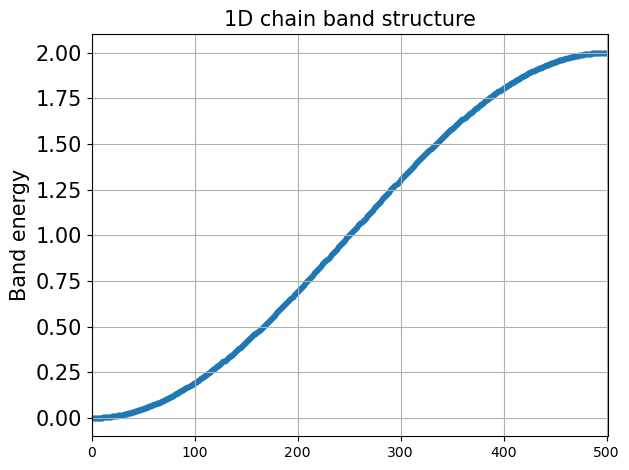

In [6]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(np.arange(len(eigvals)),eigvals,s=10)

ax.set_title("1D chain band structure",fontsize=15)
ax.set_ylabel("Band energy",fontsize=15)

ax.set_xlim(0,len(eigvals))
plt.yticks(fontsize=15)

plt.grid()
plt.show()

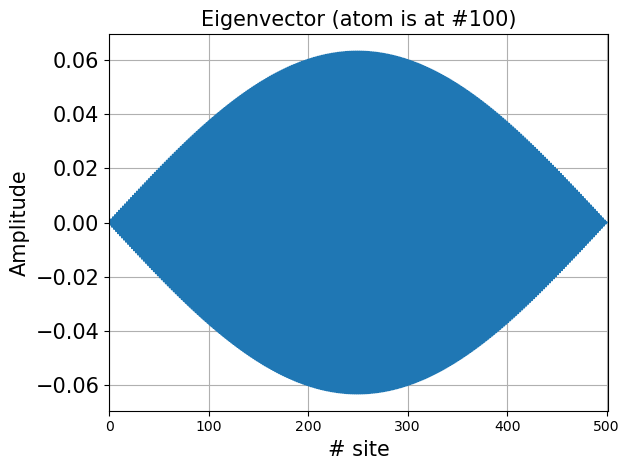

In [7]:
fig, ax = plt.subplots(tight_layout=True)

ax.plot(eigvect[:,-1])

ax.set_title("Eigenvector (atom is at #100)",fontsize=15)
ax.set_xlabel("# site",fontsize=15)
ax.set_ylabel("Amplitude",fontsize=15)

ax.set_xlim(0,len(eigvals))
plt.yticks(fontsize=15)

plt.grid()

plt.show()